In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost



c:\Users\i2u3e\anaconda3\envs\pred\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
x_train = pd.read_csv('../data/processed/train.csv', index_col=False)
x_test = pd.read_csv('../data/processed/test.csv', index_col=False)

In [3]:
y_train = x_train.pop('label')
y_test = x_test.pop('label')

In [4]:
x_train.head()

,service_dns,dpkts,state_CON,service_ftp,sttl,tcprtt,ct_dst_src_ltm,ct_src_ltm,synack,sload,...,ct_srv_src,sbytes,service_http,service_others,stcpb,ct_state_ttl,service_ssh,state_INT,sjit,spkts
0,0,-0.135769,0,0,0.703839,-0.521660,-0.705529,-0.715714,-0.484346,-0.389897,...,-0.775991,-0.049134,0,0,-0.256392,-1.366486,0,0,-0.109997,-0.104456
1,0,0.172599,0,0,-1.141901,-0.521660,-0.614256,-0.715714,-0.484346,-0.389928,...,3.147666,-0.046410,0,0,0.331031,-0.318711,0,0,-0.109302,-0.046014
2,0,-0.026933,0,0,-1.141901,0.888444,-0.522983,-0.595543,0.931748,-0.389964,...,-0.215468,-0.048527,0,0,0.846258,-0.318711,0,0,0.271392,-0.089845
3,0,-0.063212,0,1,-1.141901,-0.521660,-0.522983,-0.595543,-0.484346,-0.389958,...,-0.775991,-0.047016,0,0,0.101729,-0.318711,0,0,-0.104906,-0.060624
4,0,-0.117630,0,0,0.723268,1.096172,2.854115,-0.595543,1.154999,-0.389927,...,3.147666,-0.047554,0,0,1.082366,-0.318711,0,0,-0.056942,-0.075235


# Modeling

- Logistic Regresion
- eXtream Gradient Boosting
- Random Forest
- Categorical Boosting

- To do:

    - Gradient Descent
    - Voting
    - cv
    - Evaluations
    - Classification Report

## <center>Logistic Regression</center>
<center>Accuracy: 0.816</center>

In [8]:

# Logistic Regresion with cross-validation

lr = LogisticRegressionCV(random_state=42, cv=5)
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
accuracy_score(y_test, y_pred_lr)

c:\Users\i2u3e\anaconda3\envs\pred\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\i2u3e\anaconda3\envs\pred\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

0.8162318418112035

## <center>eXtream Gradient Boosting</center>
<center>Accuracy: 0.875</center>

In [9]:
xgb = XGBClassifier(random_state=42)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
accuracy_score(y_test, y_pred_xgb)

c:\Users\i2u3e\anaconda3\envs\pred\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\i2u3e\anaconda3\envs\pred\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:48:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8749331972987416

## <center>Random Forest</center>
<center>Accuracy: 0.873</center>


In [23]:

rf = RandomForestClassifier(n_estimators = 150,
                            n_jobs=-1,
                            random_state=42,
                            bootstrap=True,)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
accuracy_score(y_test, y_pred_rf)

0.8726983432930088

## <center>Bagging</center>
<center>Accuracy: 0.868</center>

In [24]:
# Bagging
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
import catboost

bag_rf = BaggingClassifier(bootstrap=True, n_estimators=150, random_state=42)

bag_rf.fit(x_train, y_train)

y_pred_bag = bag_rf.predict(x_test)
accuracy_score(y_test, y_pred_bag)

0.8679857163678764

## <center>Categorical Boosting</center>
<center>Accuracy: 0.871</center>

In [25]:

cat = CatBoostClassifier(random_state=42)
cat.fit(x_train, y_train)
y_pred_cat = cat.predict(x_test)
accuracy_score(y_test, y_pred_cat)

Learning rate set to 0.093556
0:	learn: 0.4915640	total: 193ms	remaining: 3m 13s
1:	learn: 0.3852396	total: 227ms	remaining: 1m 53s
2:	learn: 0.3100725	total: 278ms	remaining: 1m 32s
3:	learn: 0.2623124	total: 316ms	remaining: 1m 18s
4:	learn: 0.2218549	total: 355ms	remaining: 1m 10s
5:	learn: 0.2028023	total: 397ms	remaining: 1m 5s
6:	learn: 0.1891011	total: 447ms	remaining: 1m 3s
7:	learn: 0.1770062	total: 509ms	remaining: 1m 3s
8:	learn: 0.1682251	total: 560ms	remaining: 1m 1s
9:	learn: 0.1554644	total: 600ms	remaining: 59.4s
10:	learn: 0.1501482	total: 679ms	remaining: 1m 1s
11:	learn: 0.1435366	total: 748ms	remaining: 1m 1s
12:	learn: 0.1401131	total: 801ms	remaining: 1m
13:	learn: 0.1370163	total: 856ms	remaining: 1m
14:	learn: 0.1353530	total: 917ms	remaining: 1m
15:	learn: 0.1328405	total: 964ms	remaining: 59.3s
16:	learn: 0.1294241	total: 1s	remaining: 57.9s
17:	learn: 0.1283353	total: 1.05s	remaining: 57.2s
18:	learn: 0.1272690	total: 1.09s	remaining: 56.4s
19:	learn: 0.12597

0.8714716027789924

# <center>Stacking</center>
<center>Accuracy: </center>

In [4]:

# Para buscar entre varios algoritmos tenemos que iniciar con Pipeline
# Si queremos buscar el mejor modelo, podemos hacerlo de la siguiente manera (con diccionarios).
# los diccionarios: {--> classifier: Algoritmo() <--,
#                    --> classifier_hiperparametro: [nuestros posibles hiperparametros] <-- }


pipe = Pipeline(steps=[                 # Creamos un clasificador (con un LinR)
    ('classifier', LinearRegression())  # El pipeline tiene que tener cualquiera de los modelos que queramos estimar.
])                                      # Por ejemplo aqui se inicia el Pipeline con un LinearRegression.
######### Algoritmos ####################

svm_param = {                           # Otro (SVC)
    'classifier': [SVC()],
    'classifier__C': [0.01, 0.5, 1, 10],
    'classifier__kernel': ['rbf']
}


xgb_param = {
    'classifier': [xgboost.XGBRFClassifier()],
    'classifier__n_estimators': [range(0, 170, 10)],
    'classifier__max_depth': [range(30), 10],
    'classifier__booster': ['gbtree']
}

random_forest_params = {               
    'classifier': [RandomForestClassifier()],
    'classifier__n_estimators': [range(0, 170, 10)],
    'classifier__max_depth': [range(30), 10]
}

##############################################
search_space = [                             # modelos                         
    svm_param,
    xgb_param,
    random_forest_params
]


##############################################


clf = GridSearchCV(estimator = pipe,         # Es el GridSearch de un pipe (pipeline)
                  param_grid = search_space, # Metemos todos los modelos con sus posibles hiperparametros
                  cv = 10)

clf.fit(x_train, y_train)

In [ ]:
y_pred1 = clf.best_estimator_.predict(x_test)
print('accuracy', accuracy_score(y_test, y_pred1))
print('best score', clf.best_score_)

## Feature Importance

In [9]:
# First lets take a look to our features

features = pd.read_csv('../data/raw/NUSW-NB15_features.csv', encoding='cp1252')
features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [10]:
pd.options.display.max_colwidth = 130

C:\Users\i2u3e\AppData\Local\Temp\ipykernel_23980\1872104627.py:8: DtypeWarning: Columns (2,4,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/ids_limpio.csv')


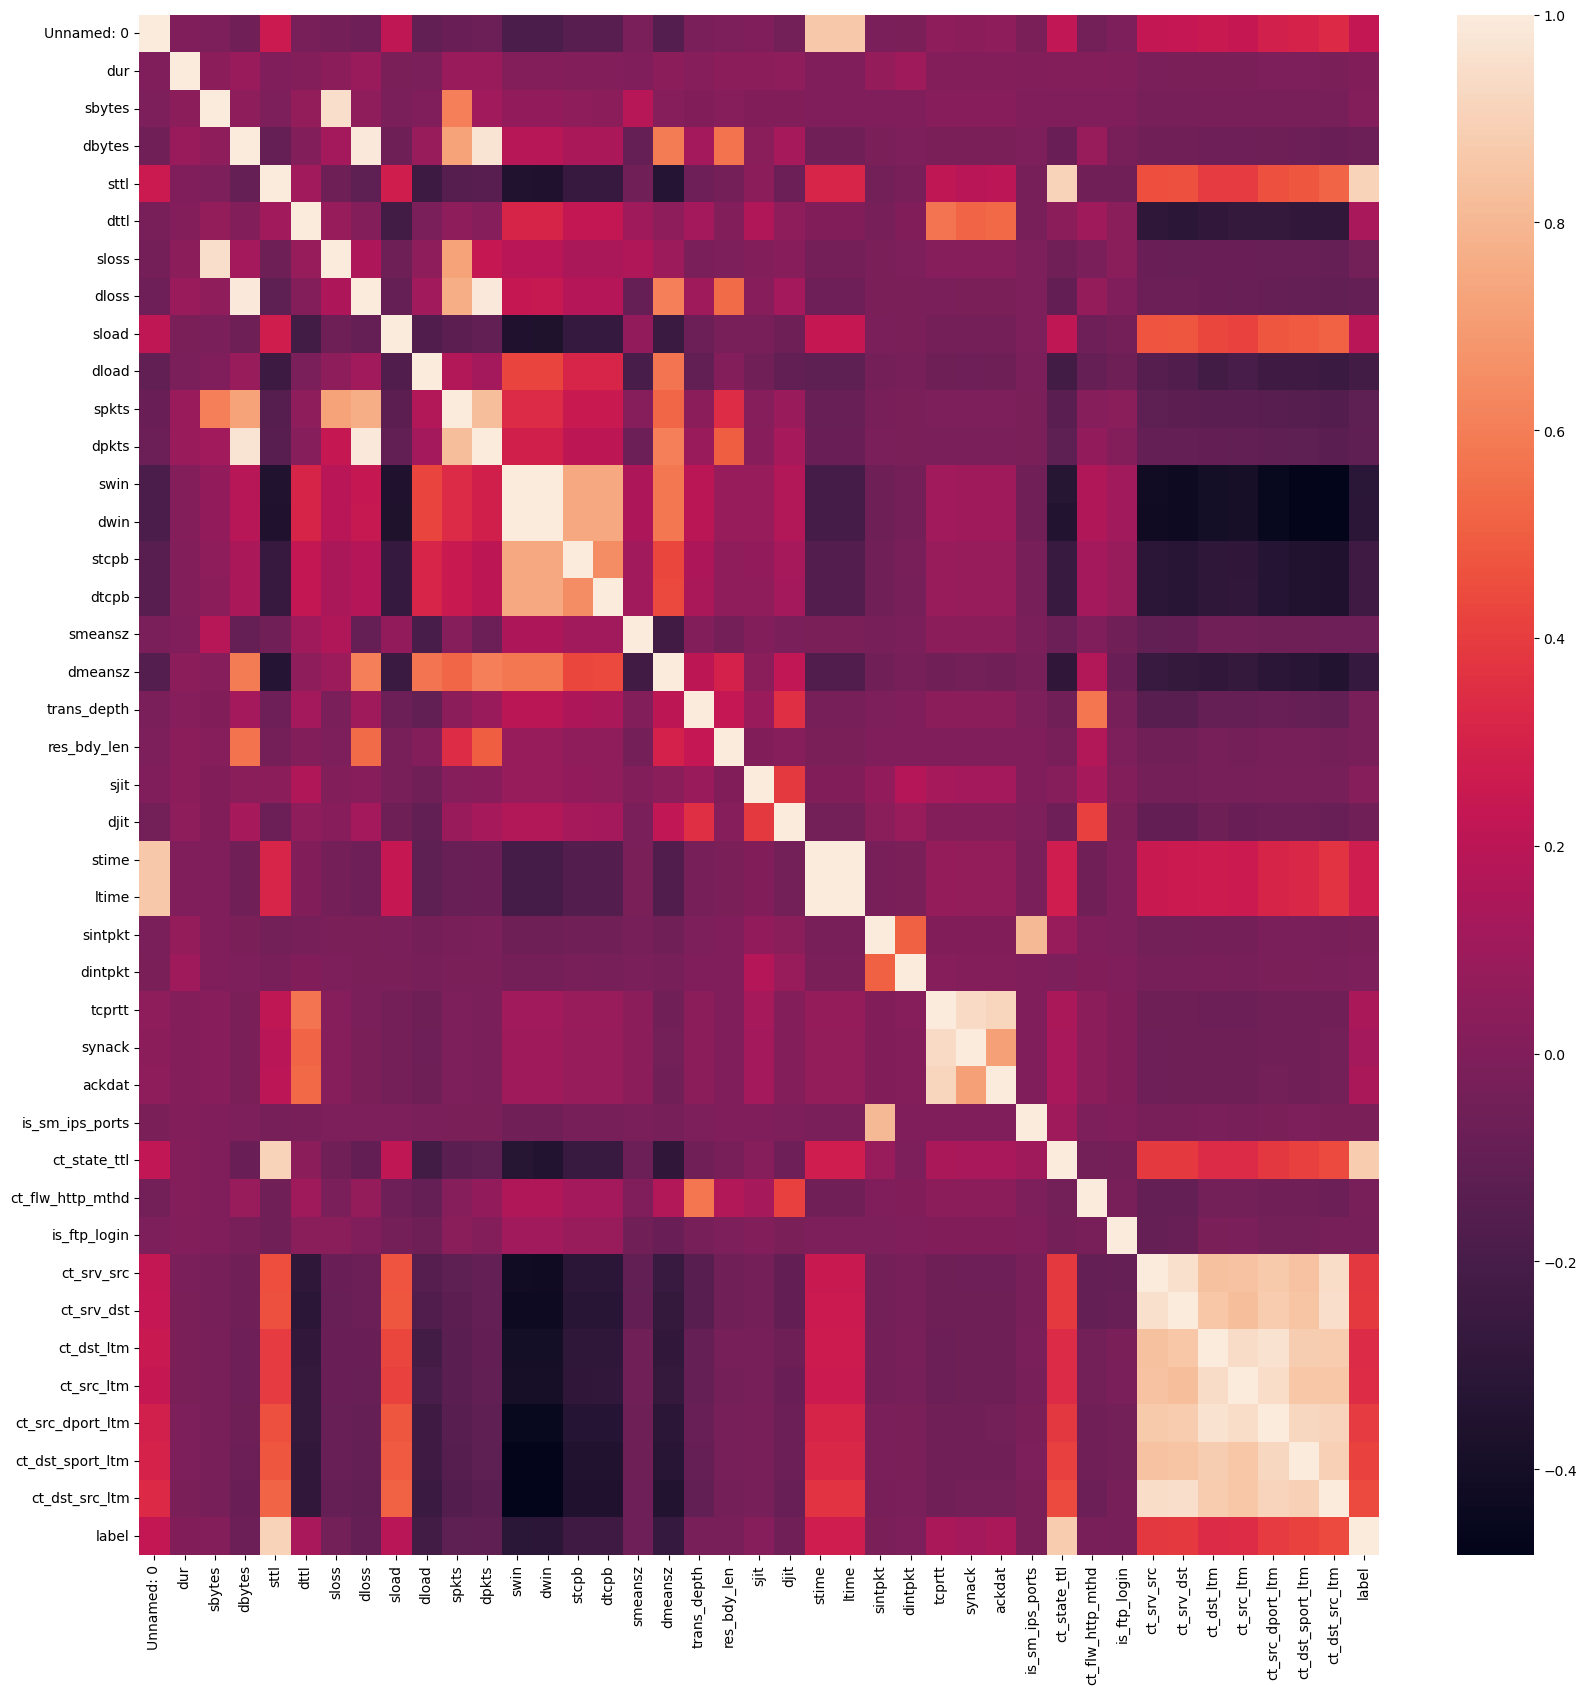

In [13]:
##############################################
######## no ejecutar esta celda  #############
######## datos demasiado pesados #############
##############################################

# correlations

df = pd.read_csv('../data/raw/ids_limpio.csv') 
plt.figure(figsize=(20,20))
sns.heatmap(df.corr());

In [14]:
rf.feature_importances_

array([8.86991699e-04, 1.45287386e-02, 2.94316840e-03, 3.06350221e-04,
       1.41603936e-01, 3.22001823e-02, 2.22717039e-02, 7.86253293e-03,
       2.60560334e-02, 2.36649937e-02, 2.93108406e-02, 4.11562126e-06,
       5.91877194e-02, 1.21854449e-03, 5.95900840e-05, 2.53575826e-02,
       1.30970503e-03, 8.77869675e-03, 3.07013604e-03, 3.81367087e-02,
       1.40761115e-02, 3.07465418e-03, 7.31719165e-03, 8.19540842e-04,
       1.24539624e-02, 4.89512229e-02, 2.39949453e-04, 6.49562588e-03,
       5.45634912e-02, 4.26206967e-02, 3.90577778e-05, 2.48886069e-02,
       2.90840978e-02, 7.49125000e-03, 4.14596058e-05, 6.04228586e-04,
       1.32582917e-04, 2.31315310e-02, 1.12292830e-02, 3.89887607e-03,
       6.80633278e-03, 4.07185783e-03, 2.58198967e-02, 2.18030073e-02,
       3.19229900e-02, 1.69263037e-03, 3.97833397e-05, 7.14367733e-03,
       1.31015127e-01, 2.83067859e-06, 1.90590854e-02, 1.07713709e-02,
       9.93971896e-03])

In [15]:
fi = pd.DataFrame(rf.feature_importances_,
                    x_train.columns,
                    columns= ['Feature Importance']).sort_values('Feature Importance', ascending=False)
fi

,Feature Importance
sttl,0.141604
ct_state_ttl,0.131015
rate,0.059188
dload,0.054563
dttl,0.048951
dmean,0.042621
ackdat,0.038137
tcprtt,0.032200
sbytes,0.031923
ct_srv_dst,0.029311


In [ ]:
fi.iloc[:13].to_clipboard()

In [ ]:
fi.iloc[13:].sum().to_clipboard()

In [130]:
fi100 = (fi.iloc[:13])

In [135]:
fi100 = round(fi100)


In [136]:
fi100

,Feature Importance
sttl,14.0
ct_state_ttl,13.0
rate,6.0
dload,5.0
dttl,5.0
dmean,4.0
ackdat,4.0
tcprtt,3.0
sbytes,3.0
ct_srv_dst,3.0


In [137]:
# presentation porpuses

fi100.to_clipboard()

In [133]:
nofi100 = fi.iloc[13:].sum()

In [134]:
nofi100 = round(nofi100)

In [126]:
nofi100 = nofi100 * 100

In [109]:
fi100.index

Index(['sttl', 'ct_state_ttl', 'rate', 'dload', 'dttl', 'dmean', 'ackdat',
       'tcprtt', 'sbytes', 'ct_srv_dst', 'dur', 'synack', 'dinpkt'],
      dtype='object')

In [102]:
# presentation porpuses

nofi100.to_clipboard()

In [118]:
fi100.index

Index(['sttl', 'ct_state_ttl', 'rate', 'dload', 'dttl', 'dmean', 'ackdat',
       'tcprtt', 'sbytes', 'ct_srv_dst', 'dur', 'synack', 'dinpkt'],
      dtype='object')

In [116]:
sns.barplot(x=fi100.index.str, y=fi100)

AttributeError: 'bool' object has no attribute 'all'

In [80]:
round(fi.iloc[13:].sum(), 2)

Feature Importance    0.31
dtype: float64

In [67]:
print(fi.iloc[:13] * 100)

              Feature Importance
sttl                   14.160394
ct_state_ttl           13.101513
rate                    5.918772
dload                   5.456349
dttl                    4.895122
dmean                   4.262070
ackdat                  3.813671
tcprtt                  3.220018
sbytes                  3.192299
ct_srv_dst              2.931084
dur                     2.908410
synack                  2.605603
dinpkt                  2.581990


In [73]:
(fi.iloc[13:].sum() * 100).to_clipboard()

In [64]:
fi.iloc[13:]

,Feature Importance
sinpkt,0.025358
smean,0.024889
sload,0.023665
dbytes,0.023132
ct_dst_src_ltm,0.022272
ct_srv_src,0.021803
state_INT,0.019059
dpkts,0.014529
djit,0.014076
ct_dst_sport_ltm,0.012454


In [53]:
fi.to_clipboard

<bound method NDFrame.to_clipboard of                      Feature Importance
sttl                           0.141604
ct_state_ttl                   0.131015
rate                           0.059188
dload                          0.054563
dttl                           0.048951
dmean                          0.042621
ackdat                         0.038137
tcprtt                         0.032200
sbytes                         0.031923
ct_srv_dst                     0.029311
dur                            0.029084
synack                         0.026056
dinpkt                         0.025820
sinpkt                         0.025358
smean                          0.024889
sload                          0.023665
dbytes                         0.023132
ct_dst_src_ltm                 0.022272
ct_srv_src                     0.021803
state_INT                      0.019059
dpkts                          0.014529
djit                           0.014076
ct_dst_sport_ltm               0.012454
dl

In [21]:
fi.iloc[0:7].sum()

Feature Importance    0.516079
dtype: float64

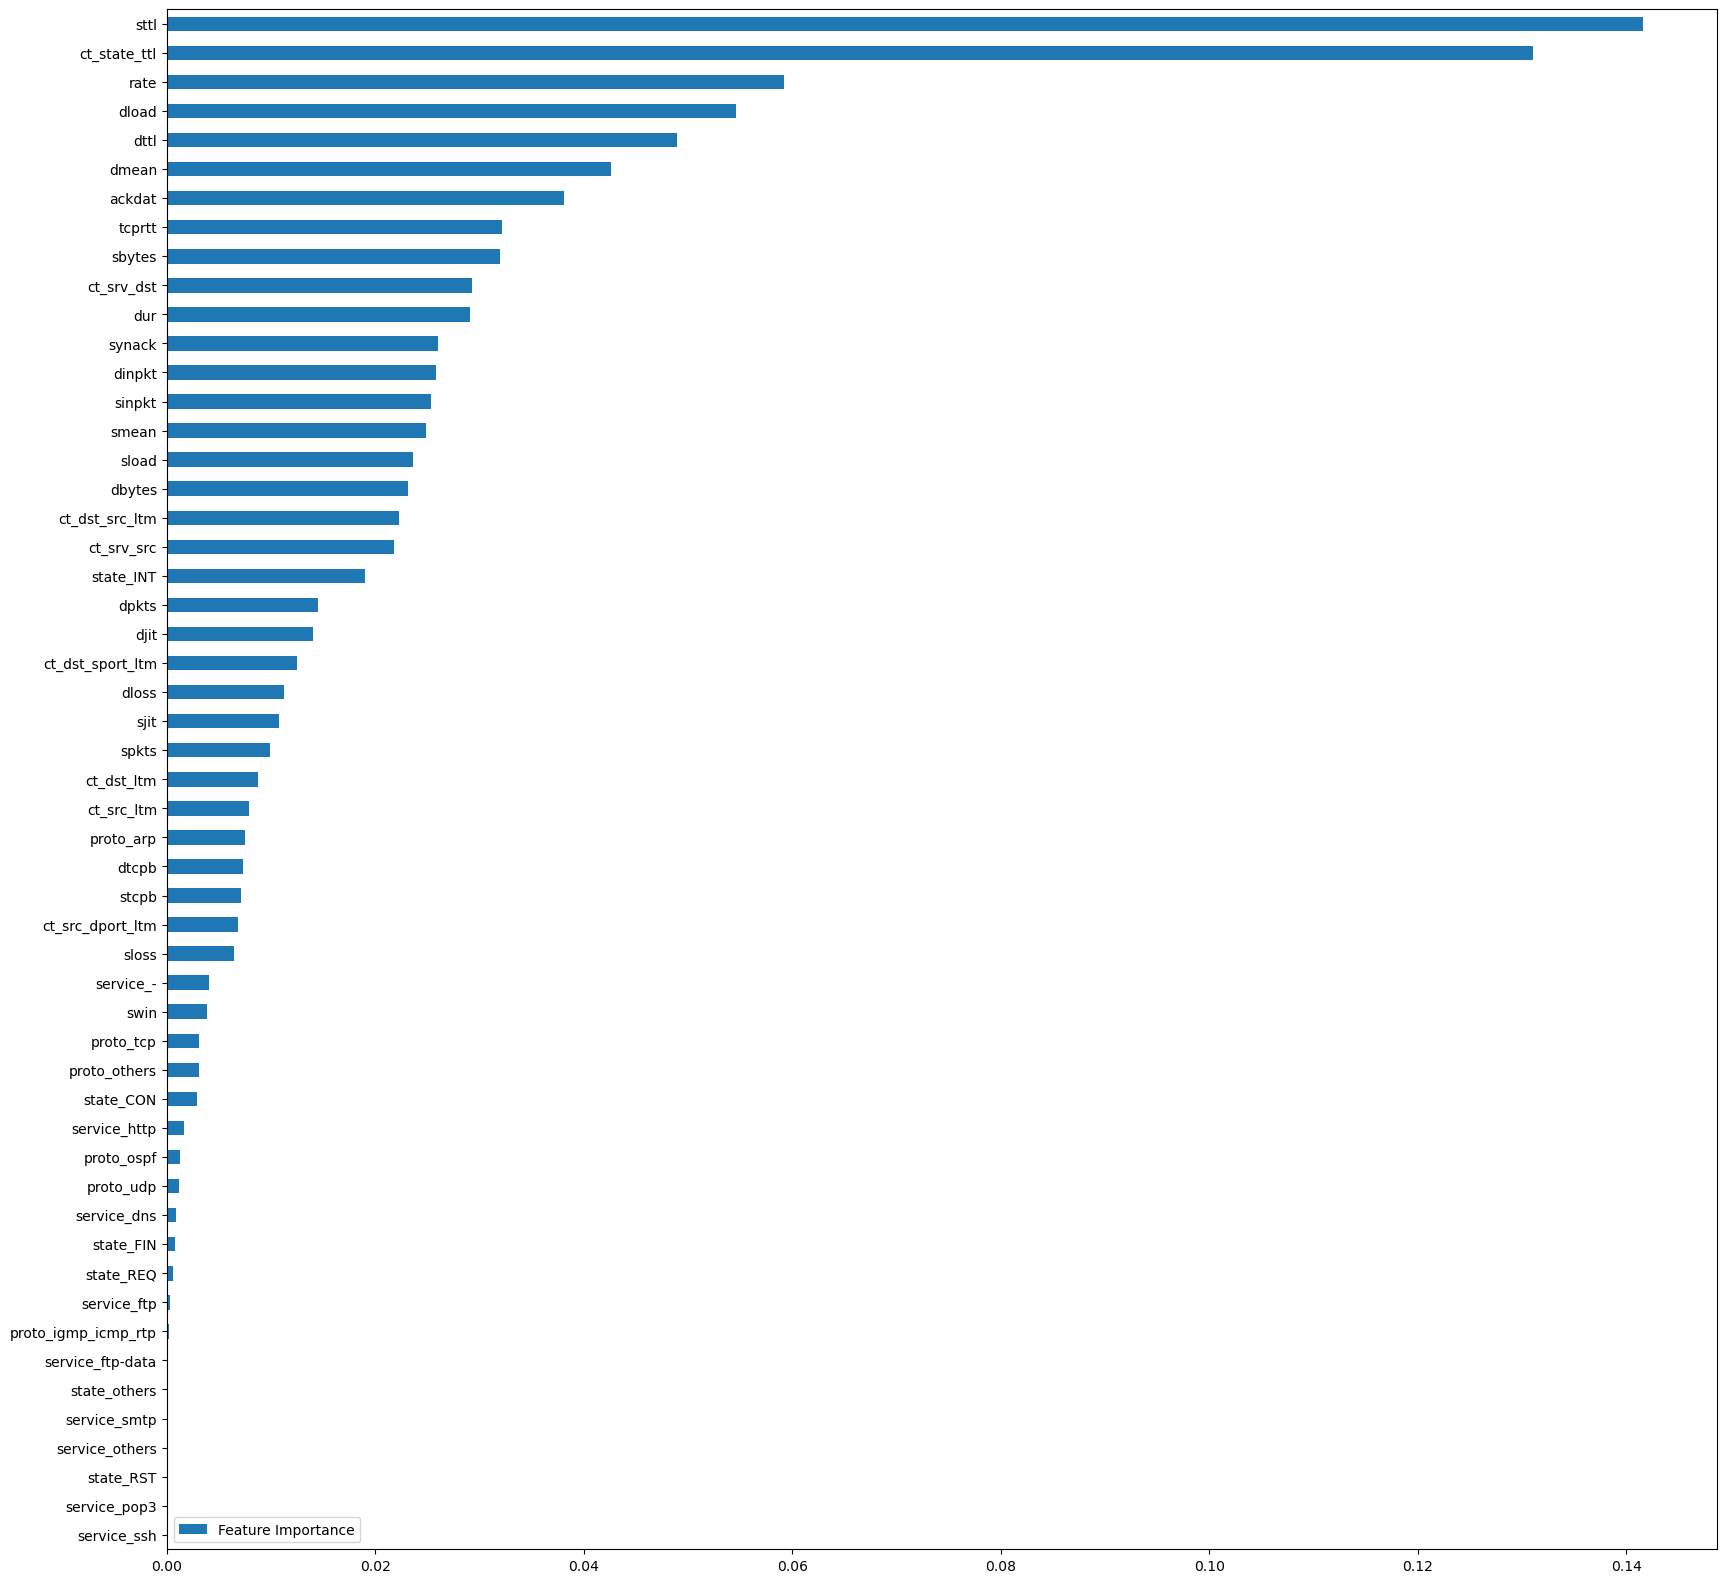

In [17]:
fi.sort_values('Feature Importance').plot.barh(y='Feature Importance', figsize=(20,20));

In [22]:
top_importance = fi.iloc[0:7,].sum() * 100 

cell_importance = f"These features account for {round(top_importance.iloc[0])}% of the total relevance of the data."



In [23]:
cell_importance

'These features account for 52% of the total relevance of the data.'

In [26]:
features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,"Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, ..."
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [30]:
top_f = ['sttl', 'ct_state_ttl' , 'rate', 'dload', 'dttl', 'dmean', 'ackdat', 'TOTAL IMPORTANCE']
top_f2 = [features.iloc[9, 3], features.iloc[36, 3], 'packed sending speed', features.iloc[15, 3], features.iloc[10, 3], features.iloc[23, 3], features.iloc[32, 3] , cell_importance]
top = pd.DataFrame(top_f2, top_f, columns=['Most important features'])
top

,Most important features
sttl,Source to destination time to live value
ct_state_ttl,No. for each state (6) according to specific range of values for source/destination time to live (10) (11).
rate,packed sending speed
dload,Destination bits per second
dttl,Destination to source time to live value
dmean,Mean of the ?ow packet size transmitted by the dst
ackdat,"TCP connection setup round-trip time, the sum of ’synack’ and ’ackdat’."
TOTAL IMPORTANCE,These features account for 52% of the total relevance of the data.


# Model Evaluation
- Accuracy
- Confusion matrix
- Classification report

## <center>Accuracy</center>

In [ ]:
results = [(accuracy_score(y_test, y_pred_lr)), (accuracy_score(y_test, y_pred_xgb)), (accuracy_score(y_test, y_pred_rf)), (accuracy_score(y_test, y_pred_cat)), (accuracy_score(y_test, y_pred_bag))]
models = ['Logistic Regression', 'XGBoost', 'Random Forest', 'CatBoost', ]

resultados = pd.Series(results, models).sort_values(ascending=False)
resultados

Random Forest          0.999903
XGBoost                0.988486
CatBoost               0.987818
Logistic Regression    0.924683
dtype: float64

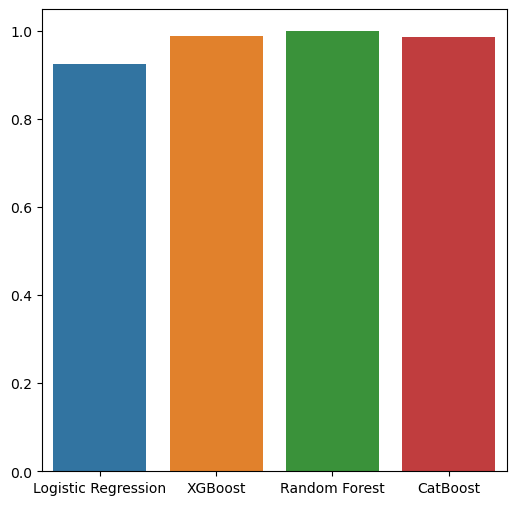

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x=models, y=results);

## <center>Classification Report & Confusion Matrix  </center>

### <center>Random Forest</center>

c:\Users\i2u3e\anaconda3\envs\pred\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


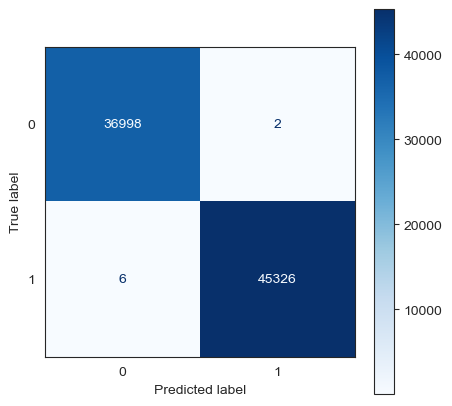

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37000
           1       1.00      1.00      1.00     45332

    accuracy                           1.00     82332
   macro avg       1.00      1.00      1.00     82332
weighted avg       1.00      1.00      1.00     82332



In [ ]:
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
plot_confusion_matrix(rf, x_test, y_test, cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, y_pred_rf))


### <center>XGBoost</center>

c:\Users\i2u3e\anaconda3\envs\pred\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


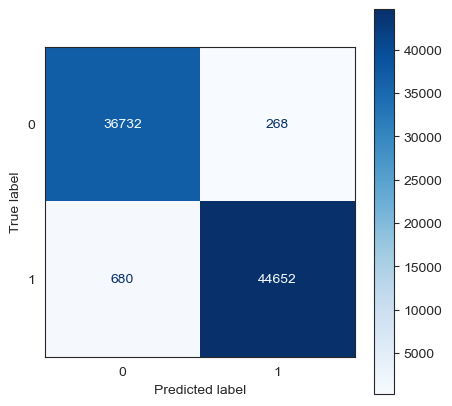

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     37000
           1       0.99      0.98      0.99     45332

    accuracy                           0.99     82332
   macro avg       0.99      0.99      0.99     82332
weighted avg       0.99      0.99      0.99     82332



In [ ]:
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
plot_confusion_matrix(xgb, x_test, y_test, cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, y_pred_xgb))

### <center>CatBoost</center>

c:\Users\i2u3e\anaconda3\envs\pred\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


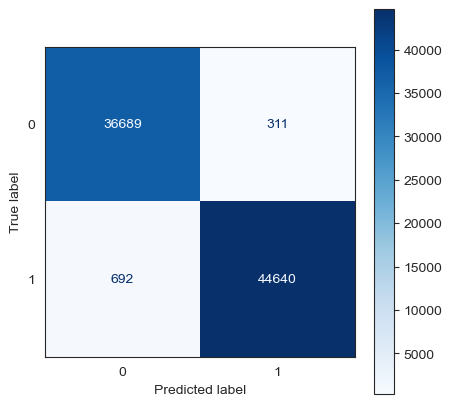

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     37000
           1       0.99      0.98      0.99     45332

    accuracy                           0.99     82332
   macro avg       0.99      0.99      0.99     82332
weighted avg       0.99      0.99      0.99     82332



In [ ]:
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
plot_confusion_matrix(cat, x_test, y_test, cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, y_pred_cat))

### <center>Logistic Regression</center>

c:\Users\i2u3e\anaconda3\envs\pred\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


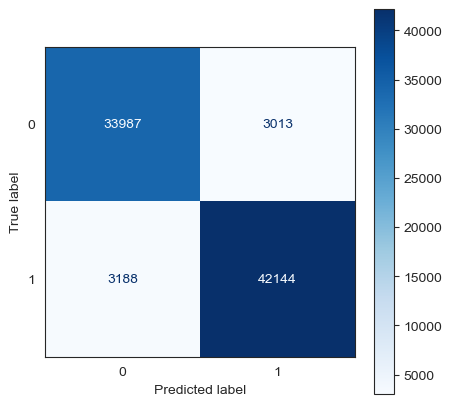

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     37000
           1       0.93      0.93      0.93     45332

    accuracy                           0.92     82332
   macro avg       0.92      0.92      0.92     82332
weighted avg       0.92      0.92      0.92     82332



In [ ]:
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
plot_confusion_matrix(lr, x_test, y_test, cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, y_pred_lr))


In [ ]:
import pickle

# random forest model
with open('../model/rf_model.pkl','wb') as rf_model:
    pickle.dump(rf,rf_model)


In [ ]:
# logistic regression model
with open('../model/lr_model.pkl','wb') as lr_model:
    pickle.dump(lr,lr_model)


In [ ]:
# catboost model
with open('../model/cat_model.pkl','wb') as cat_model:
    pickle.dump(cat,cat_model)


In [ ]:
# xgb model
with open('../model/xgb_model.pkl','wb') as xgb_model:
    pickle.dump(xgb,xgb_model)


In [ ]:

# load
#with open('model.pkl', 'rb') as f:
#    clf2 = pickle.load(f)

#clf2.predict(X[0:1])